In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv('creditcard.csv', index_col=0)

In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:


df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

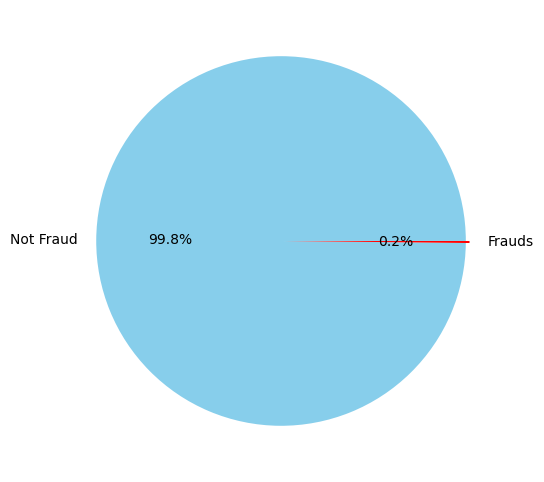

In [7]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=df.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

In [8]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
print('Size of dataset: ', df.shape)
print('duplicate rows in dataset: ', df.duplicated().sum())

Size of dataset:  (284807, 30)
duplicate rows in dataset:  9144


In [10]:
df.drop_duplicates(inplace=True)
print('Size of dataset after removing duplicate rows: ', df.shape)

Size of dataset after removing duplicate rows:  (275663, 30)


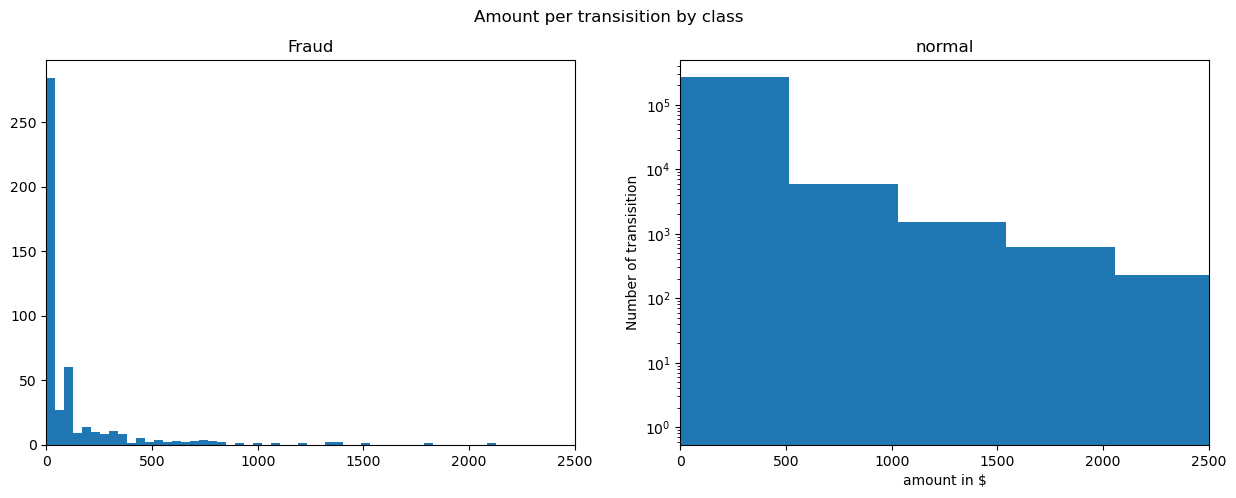

In [11]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharex=True)
f.suptitle('Amount per transisition by class')
bins =50
ax1.hist(fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel('amount in $')
plt.ylabel('Number of transisition')

plt.xlim(0,2500)
plt.yscale('log')
plt.show()

In [12]:
df[df['Class']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,275190.0,-0.029792,1.926156,-56.407510,-0.938732,-0.056188,1.295144,2.454930
V2,275190.0,-0.008288,1.653899,-72.715728,-0.615265,0.068826,0.816240,18.902453
V3,275190.0,0.037131,1.454690,-48.325589,-0.836237,0.203635,1.050013,9.382558
V4,275190.0,-0.012054,1.408379,-5.683171,-0.864528,-0.037813,0.748570,16.875344
V5,275190.0,-0.005596,1.356365,-113.743307,-0.698317,-0.059590,0.604707,34.801666
V6,275190.0,-0.011768,1.311099,-26.160506,-0.764456,-0.269979,0.388728,73.301626
V7,275190.0,0.017497,1.189184,-31.764946,-0.549753,0.045892,0.584559,120.589494
V8,275190.0,-0.007346,1.169290,-73.216718,-0.209634,0.022647,0.321160,18.709255
V9,275190.0,-0.008050,1.091353,-6.290730,-0.657122,-0.063328,0.594172,15.594995
V10,275190.0,0.012492,1.046136,-14.741096,-0.536756,-0.090628,0.472001,23.745136


In [13]:
df[df['Class']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,473.0,-4.498280,6.593145,-30.552380,-5.603690,-2.271755,-0.361428,2.132386
V2,473.0,3.405965,4.122500,-8.402154,1.145381,2.617105,4.571743,22.057729
V3,473.0,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210
V4,473.0,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672
V5,473.0,-2.957197,5.278831,-22.105532,-4.278983,-1.372245,0.260821,11.095089
V6,473.0,-1.432518,1.715347,-6.406267,-2.450444,-1.420468,-0.413647,6.474115
V7,473.0,-5.175912,6.858024,-43.557242,-6.989195,-2.902079,-0.907188,5.802537
V8,473.0,0.953255,5.585950,-41.044261,-0.161518,0.617738,1.709417,20.007208
V9,473.0,-2.522124,2.465047,-13.434066,-3.796760,-2.099049,-0.788388,3.353525
V10,473.0,-5.453274,4.706451,-24.588262,-7.297803,-4.466284,-2.447469,4.031435


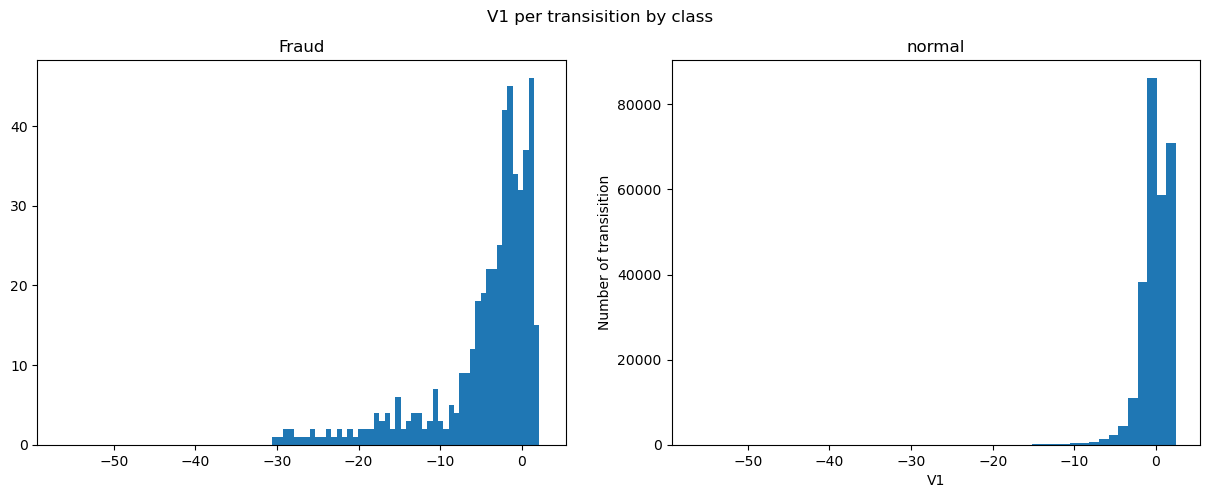

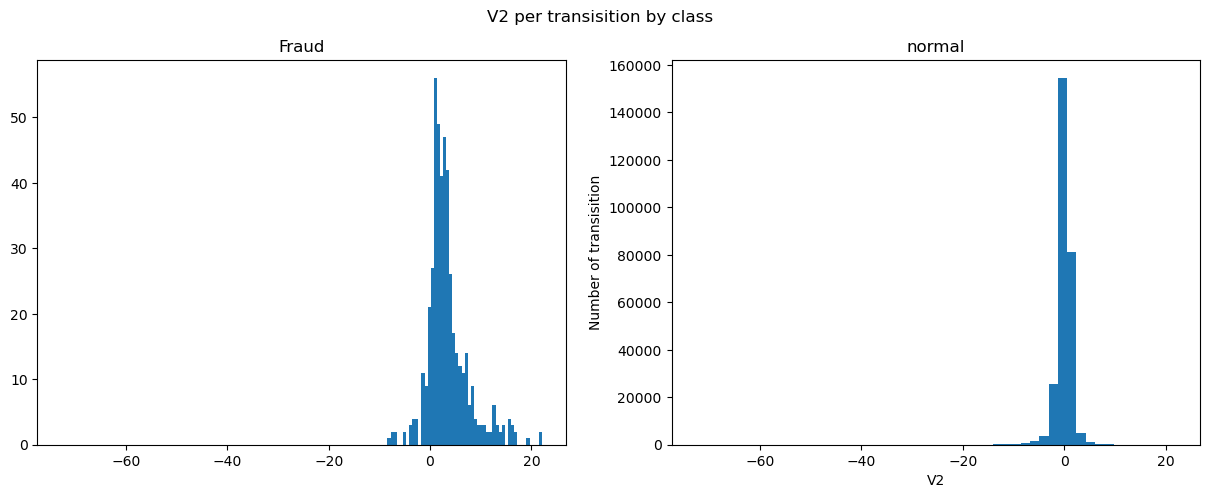

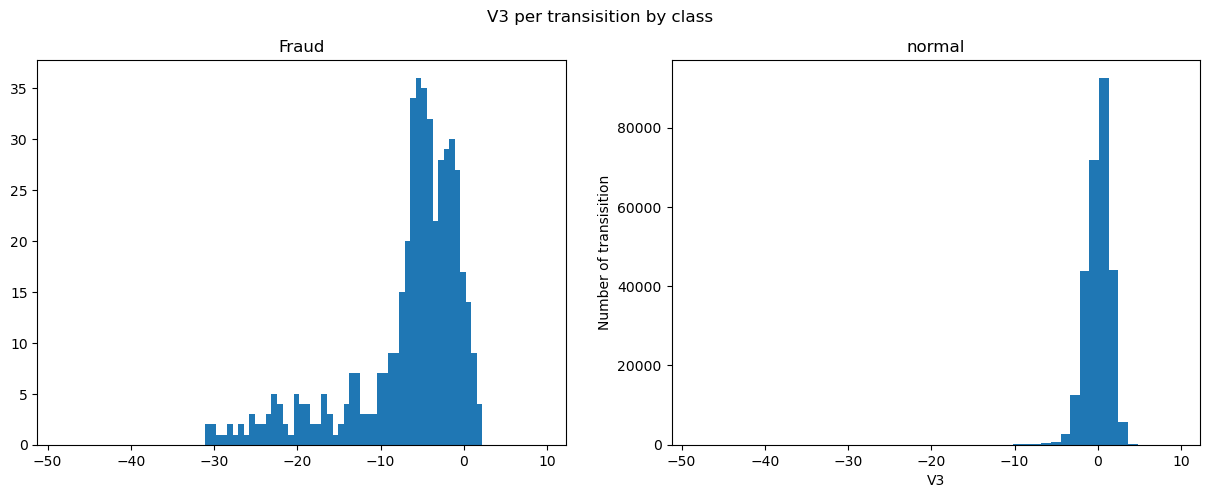

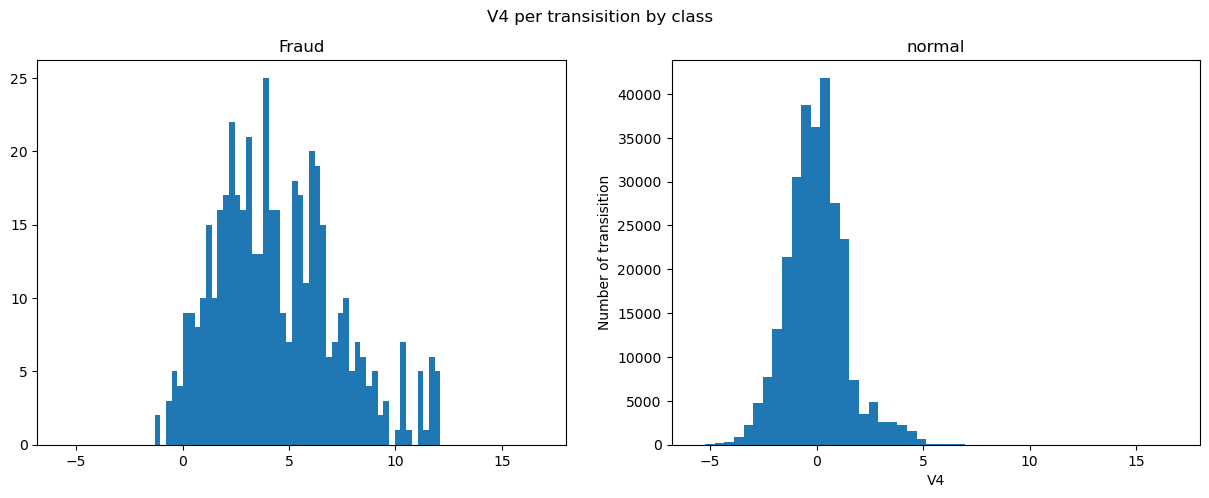

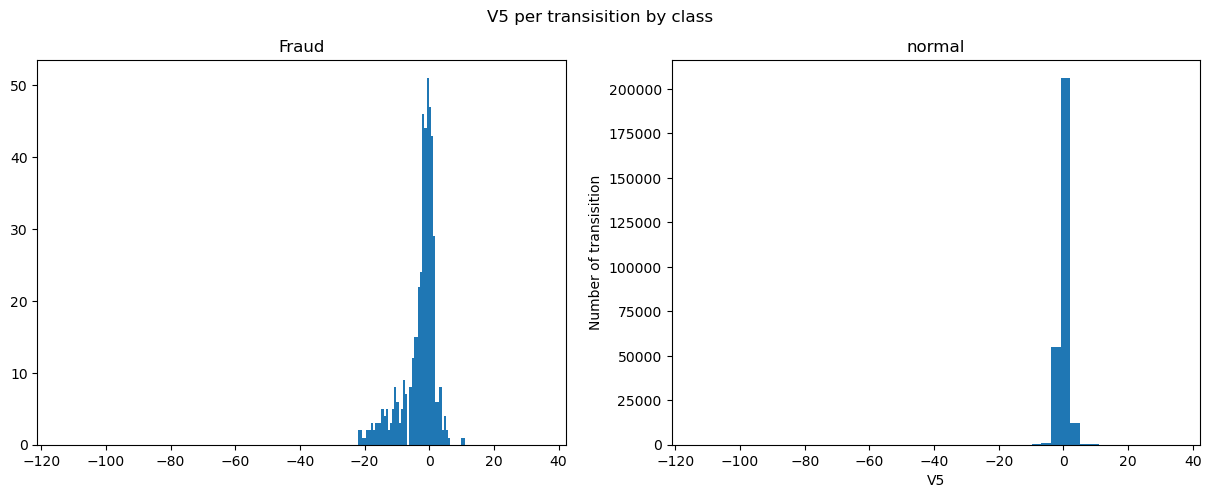

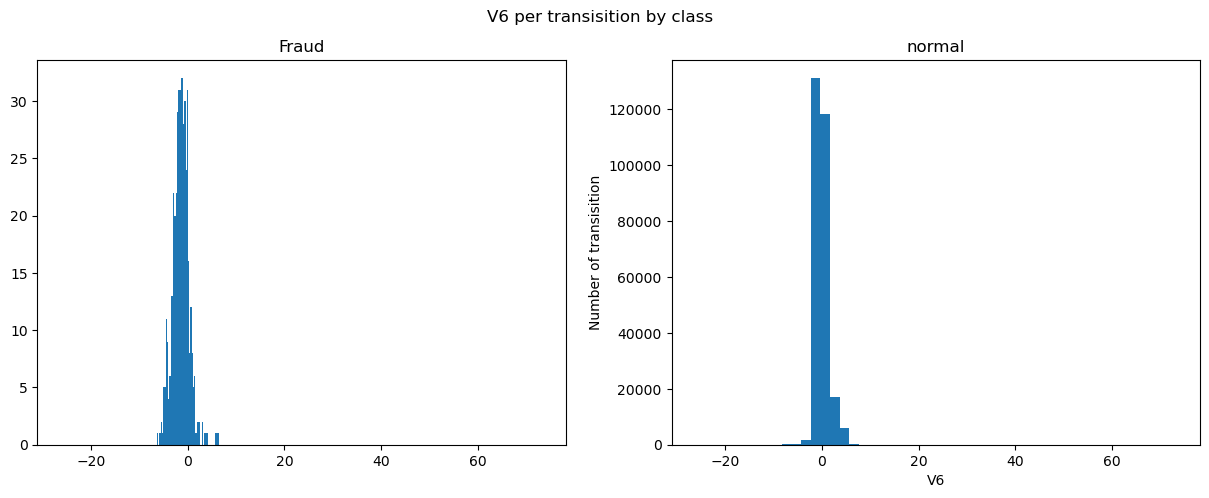

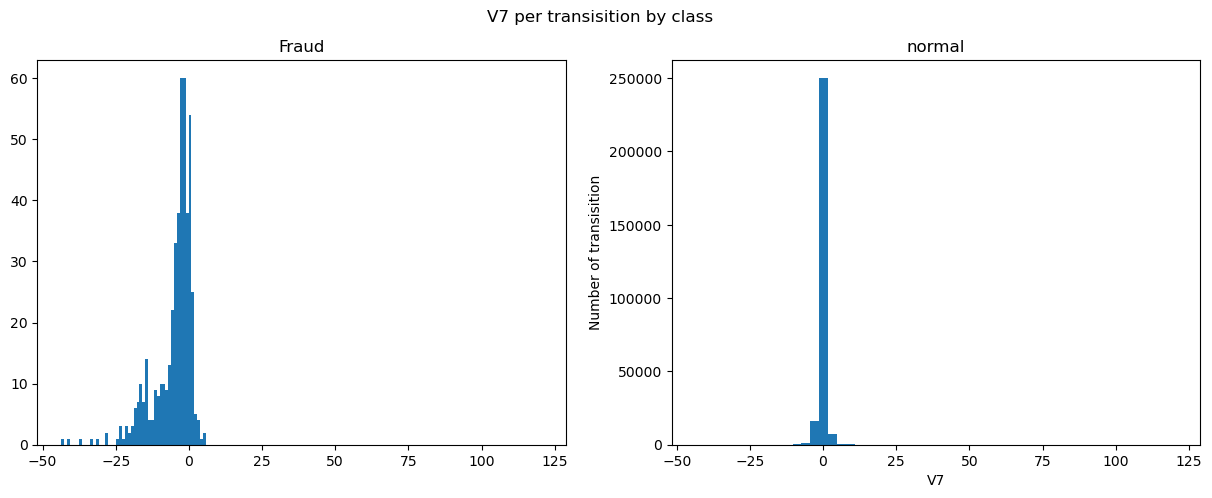

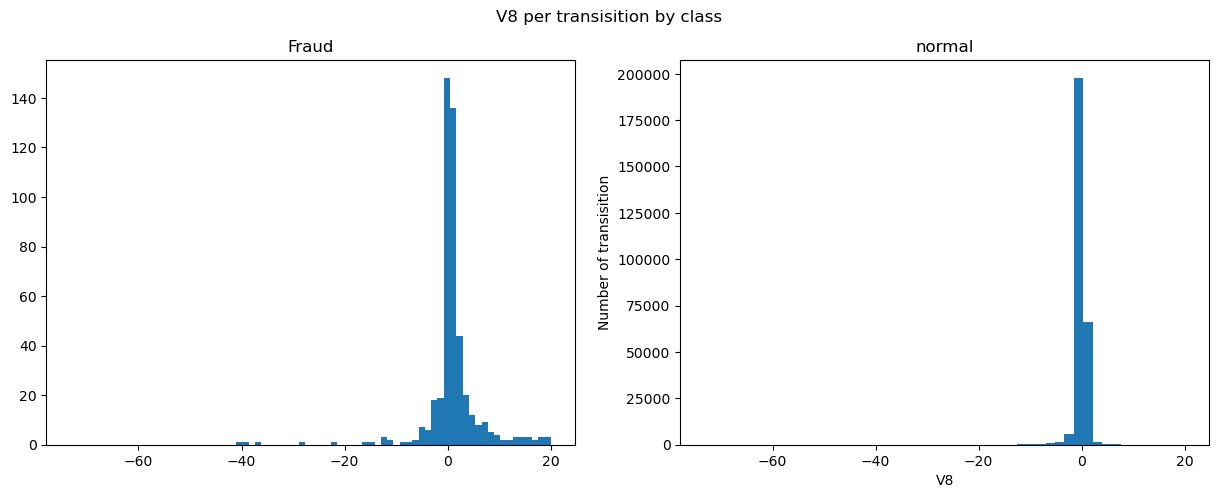

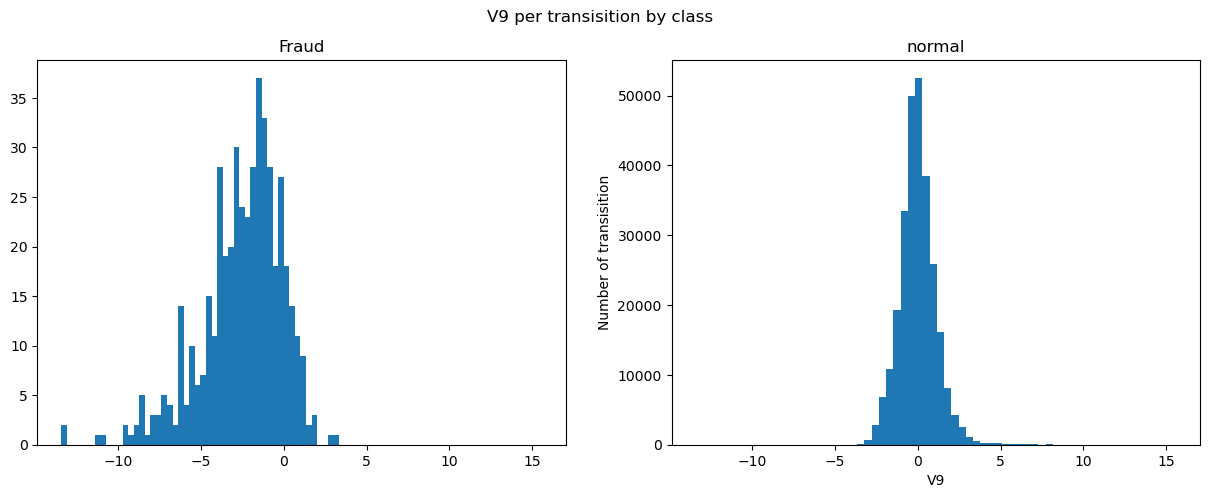

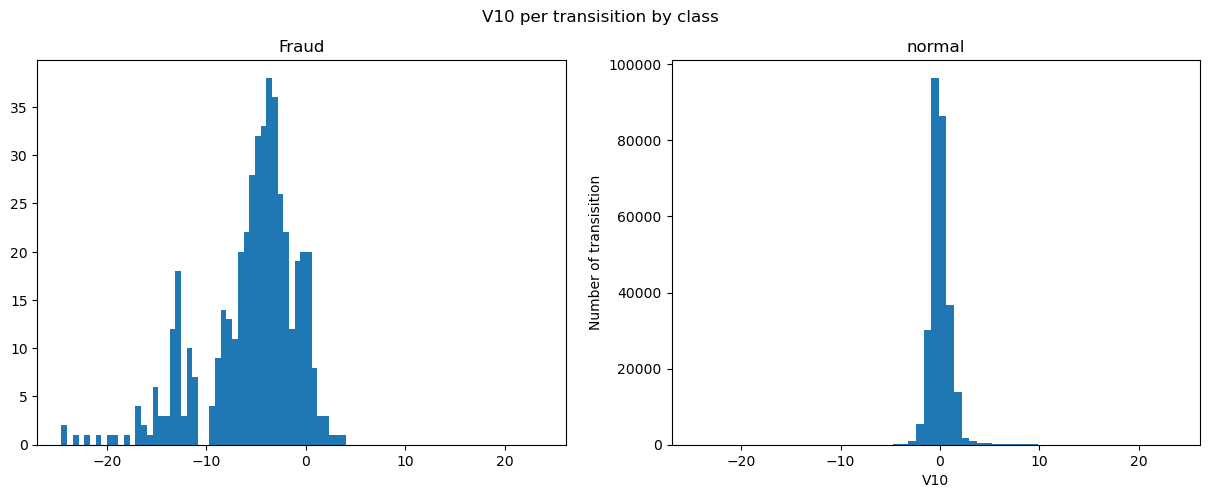

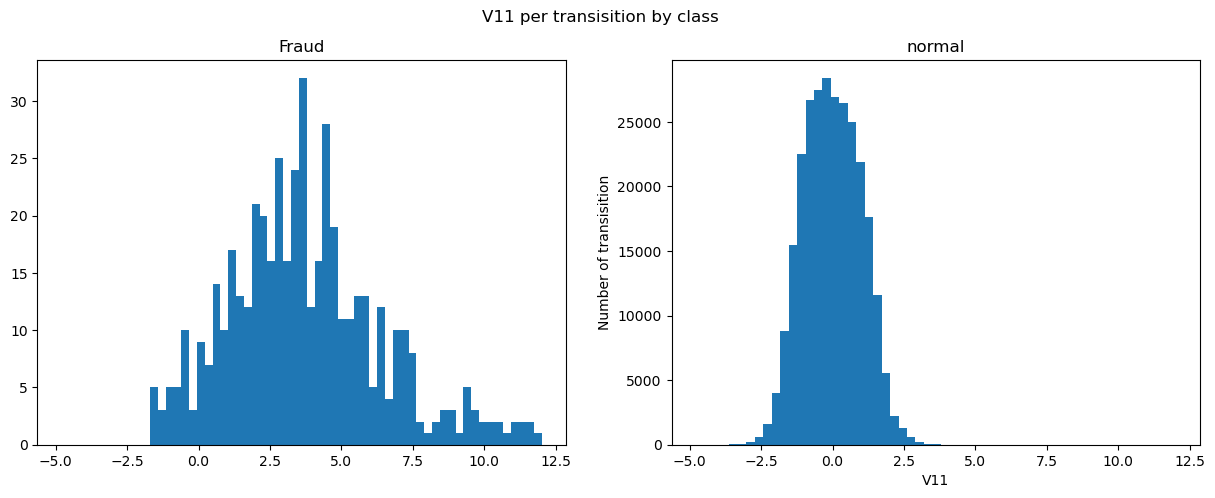

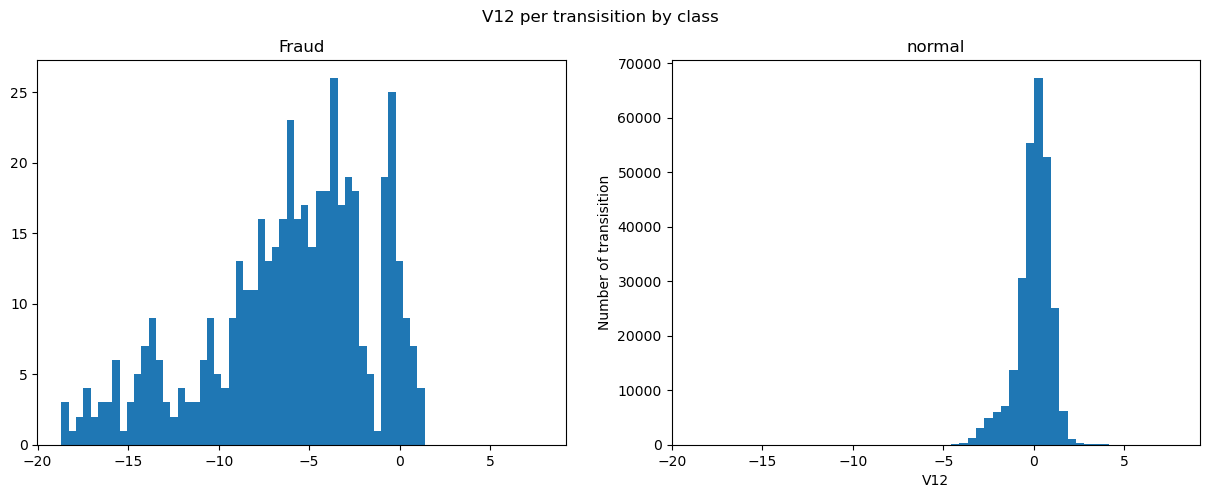

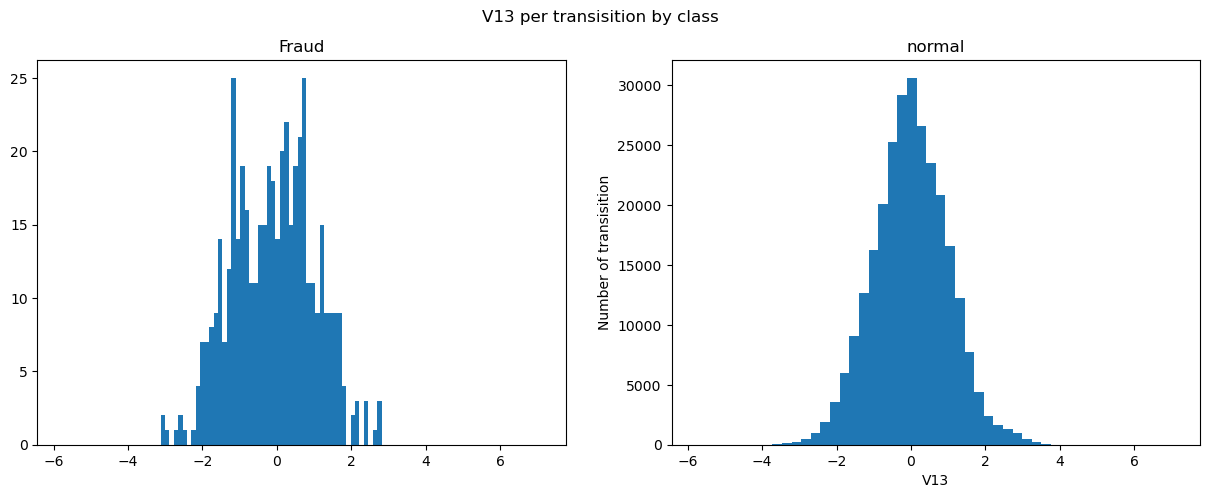

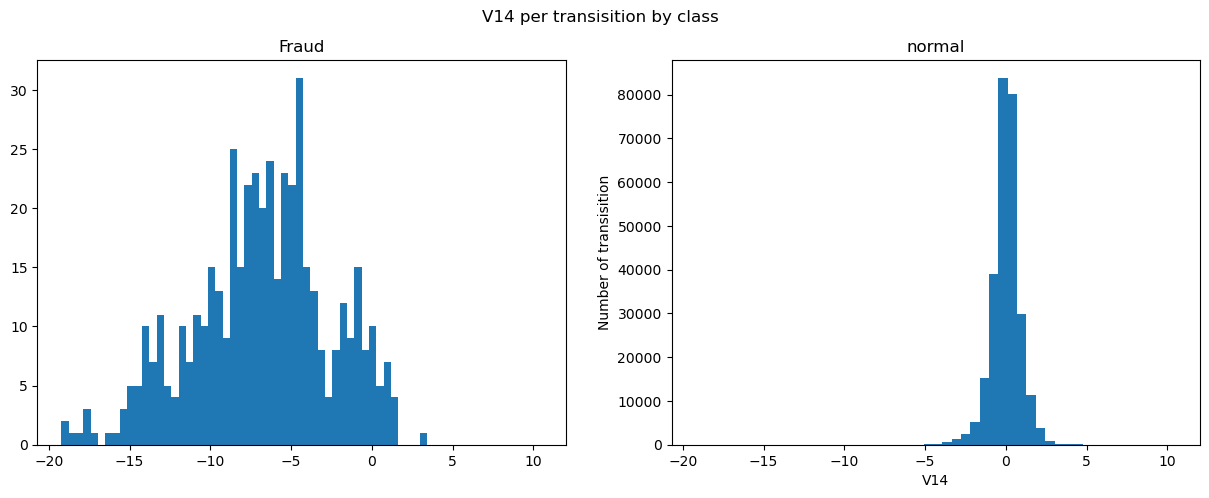

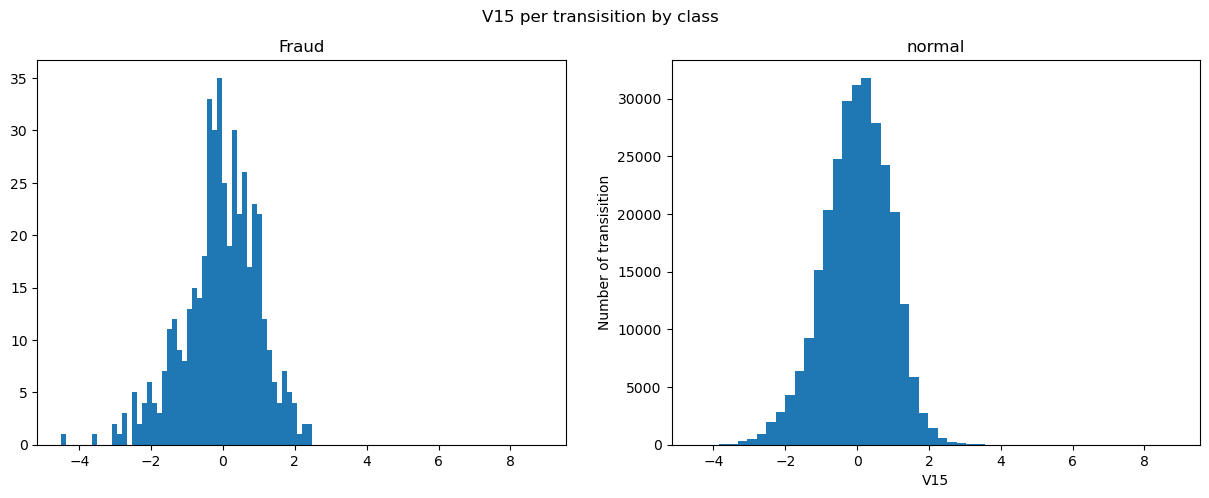

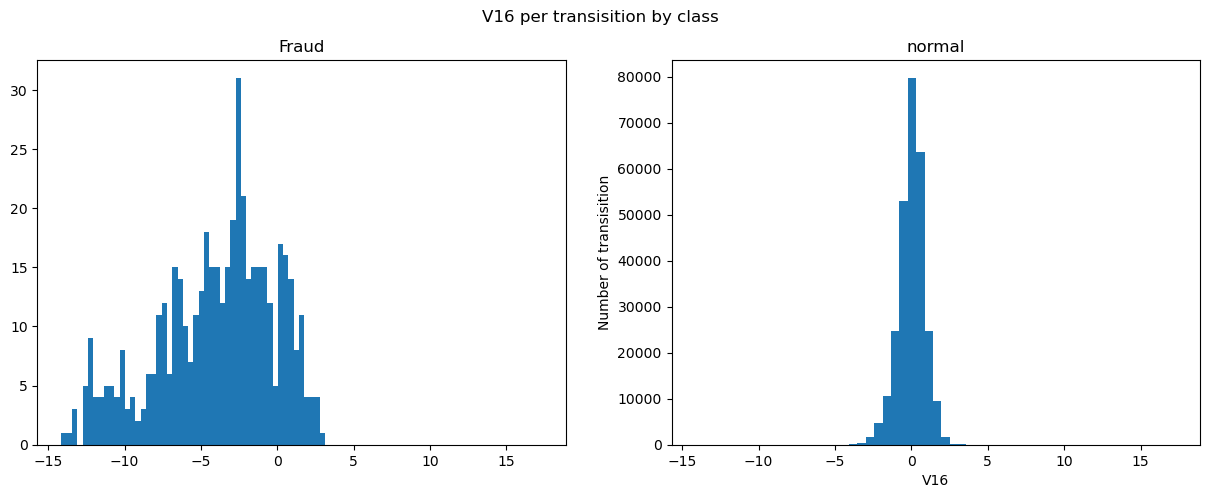

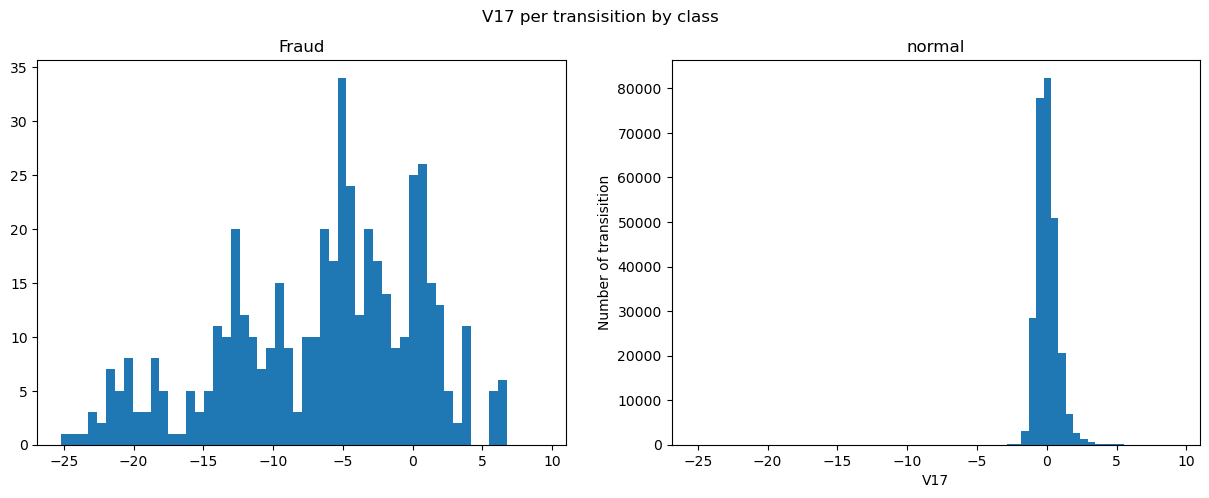

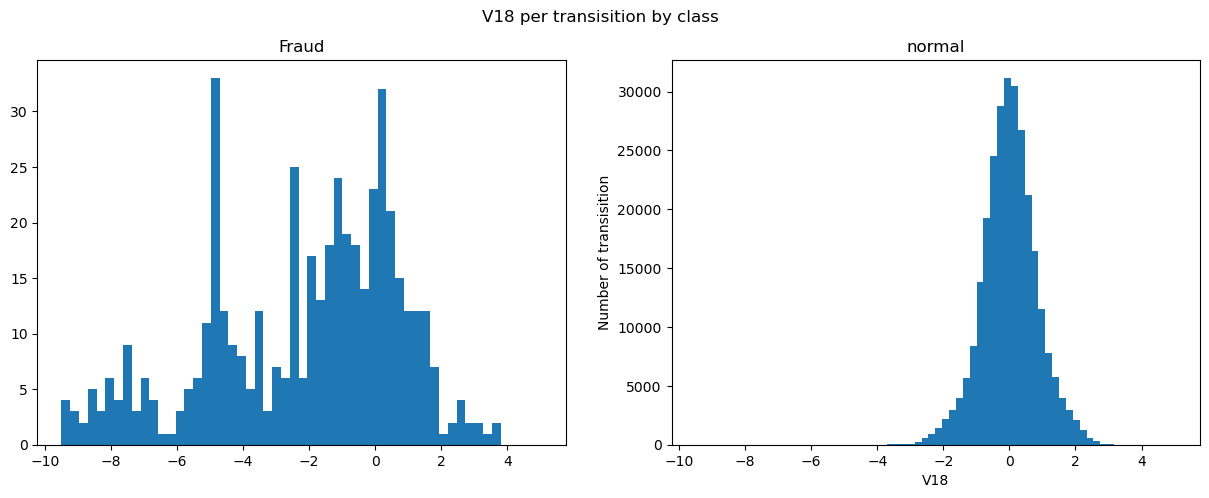

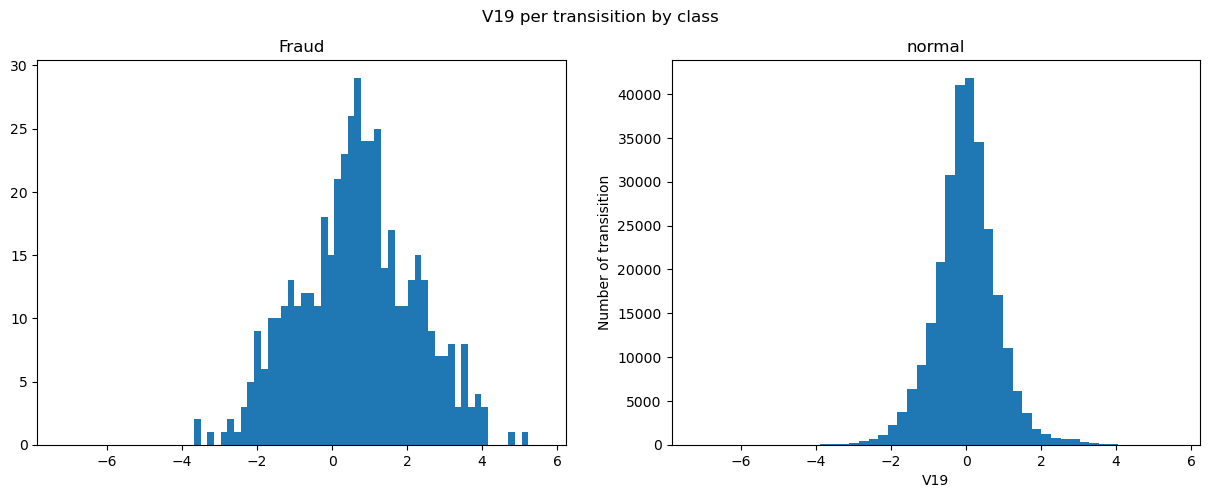

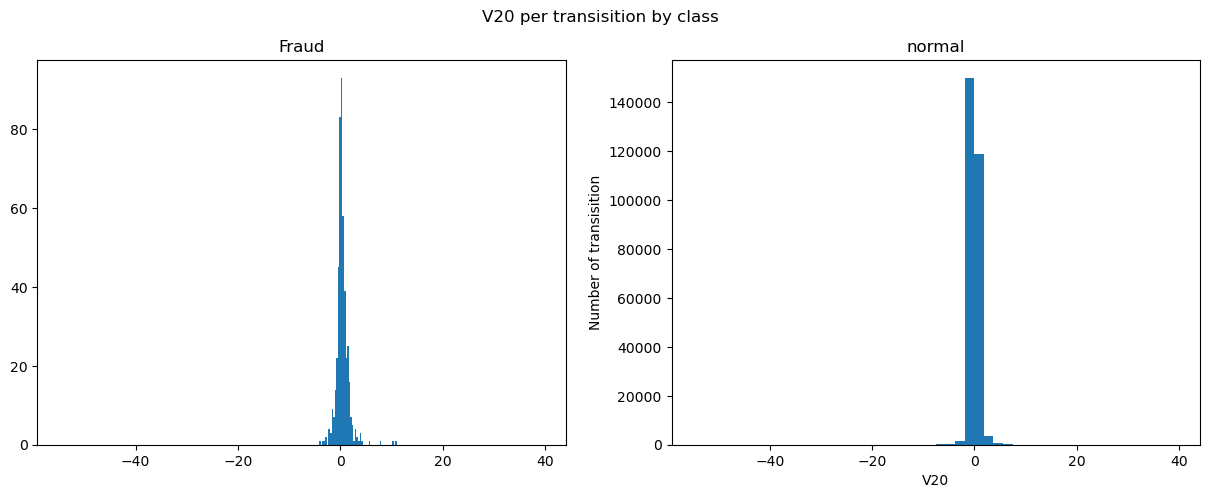

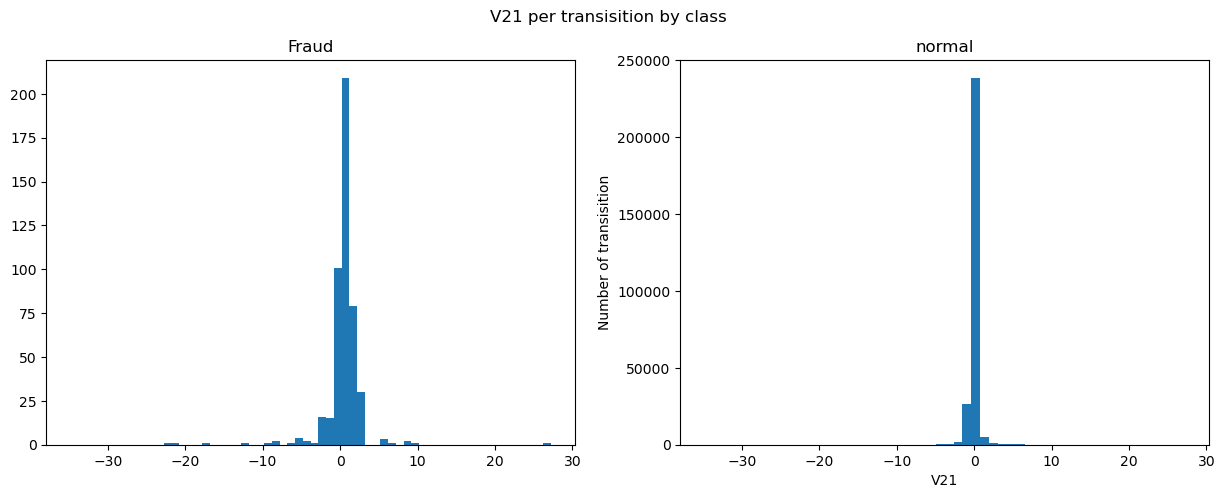

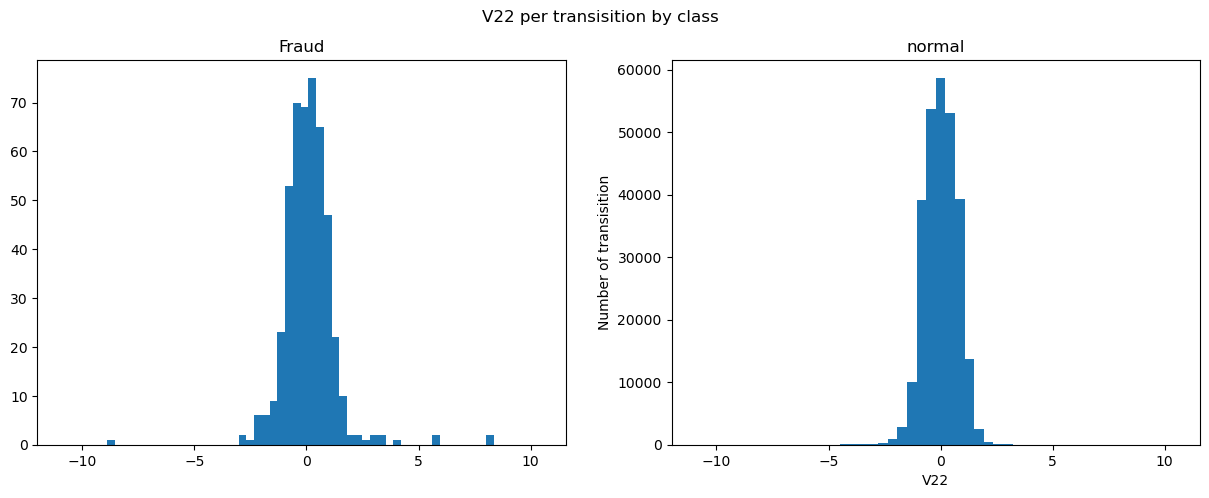

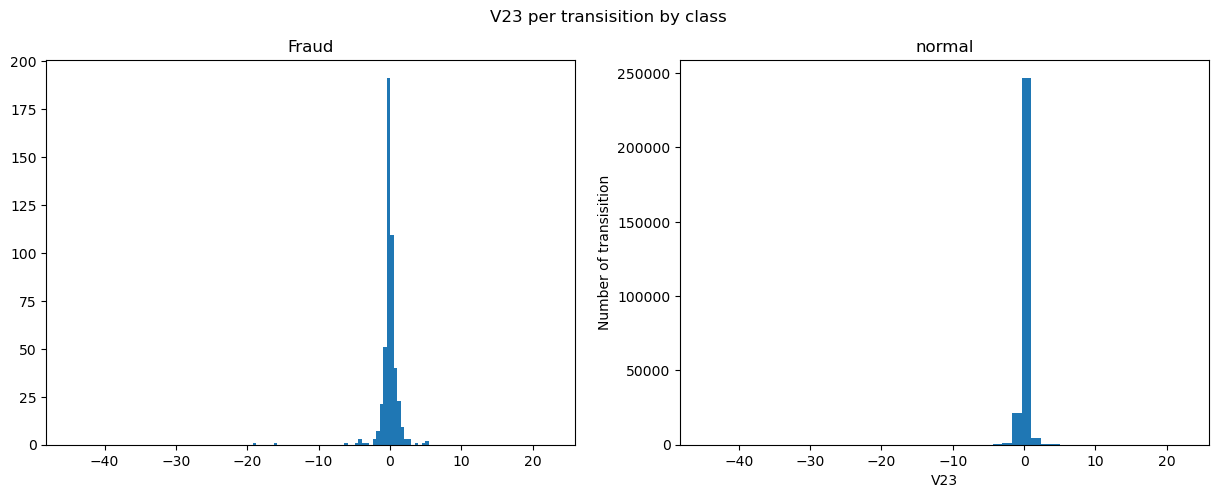

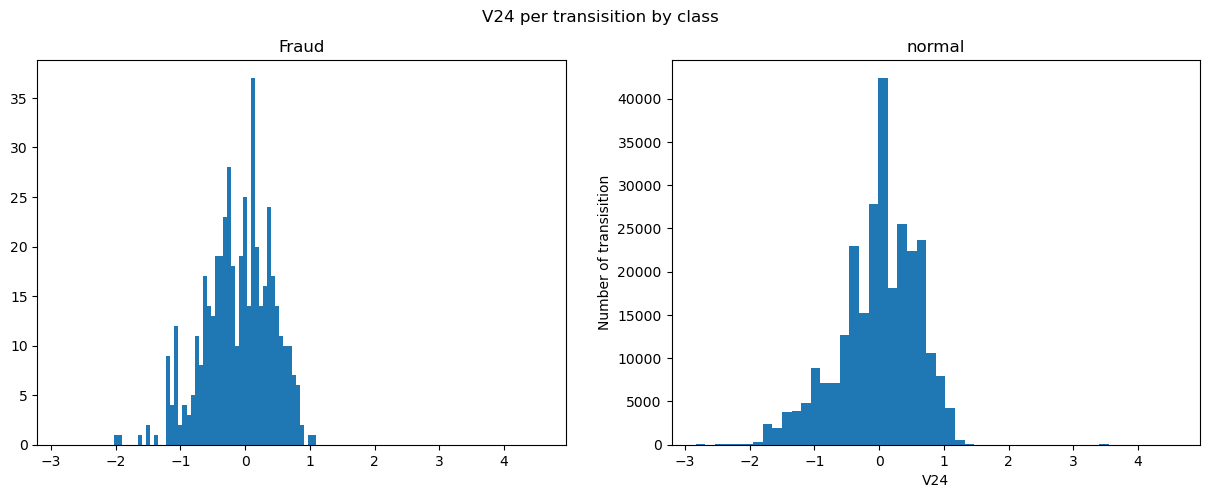

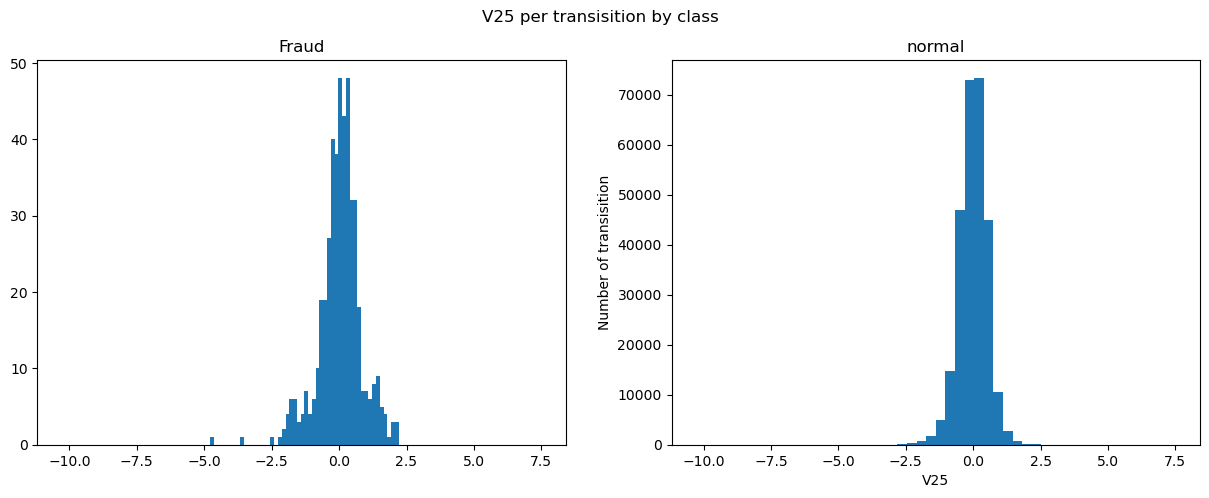

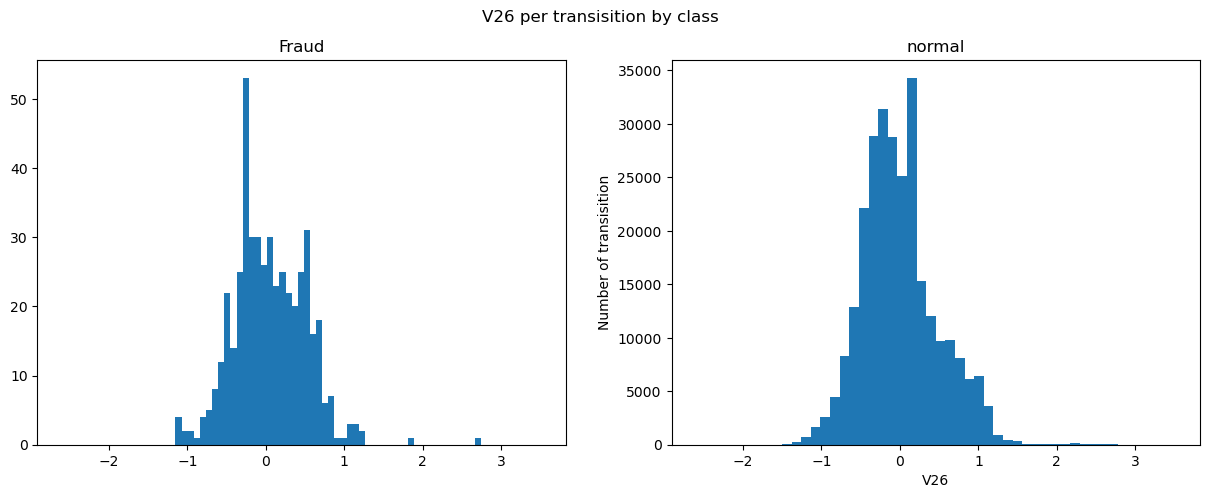

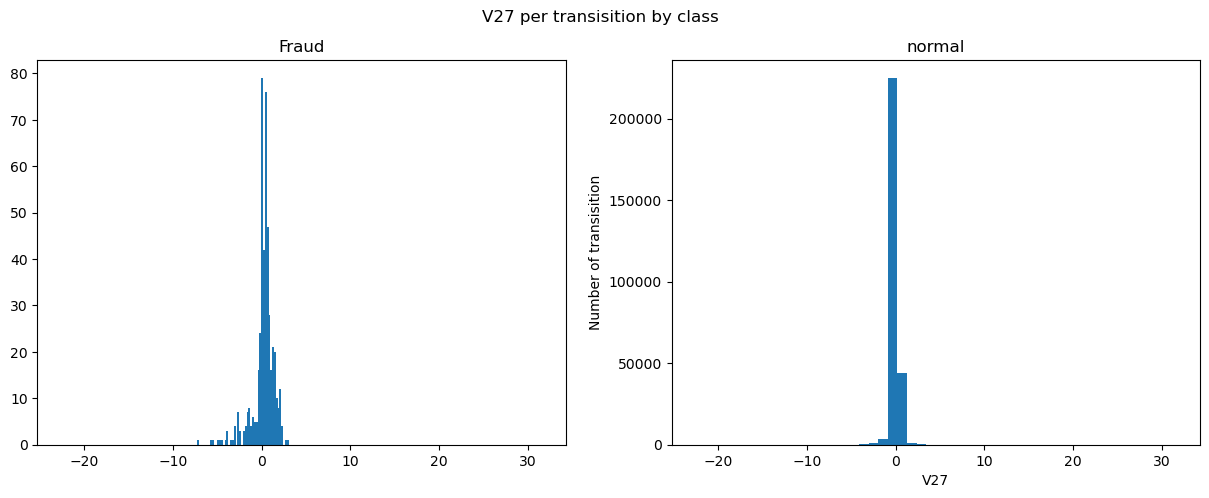

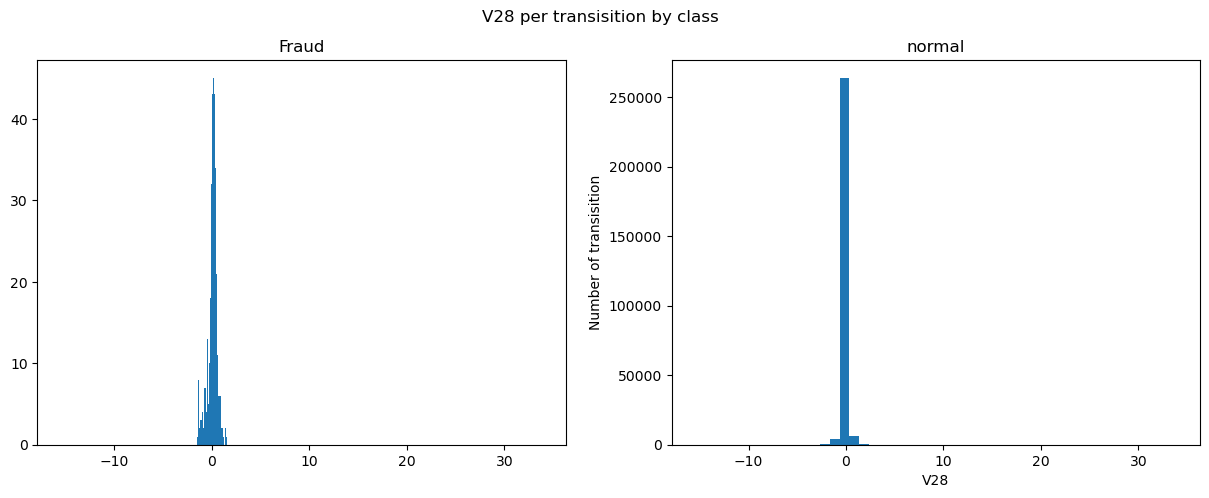

In [14]:
for col in df.columns[:-2]:
    fraud=df[df['Class']==1]
    normal=df[df['Class']==0]

    f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharex=True)
    f.suptitle('{} per transisition by class'.format(col))
    bins =50
    ax1.hist(fraud[col] , bins=bins)
    ax1.set_title('Fraud')

    ax2.hist(normal[col],bins=bins)
    ax2.set_title('normal')

    plt.xlabel('{}'.format(col))
    plt.ylabel('Number of transisition')


    plt.show()
    

Text(0.5, 1.0, 'Distribution of data for Geniune class')

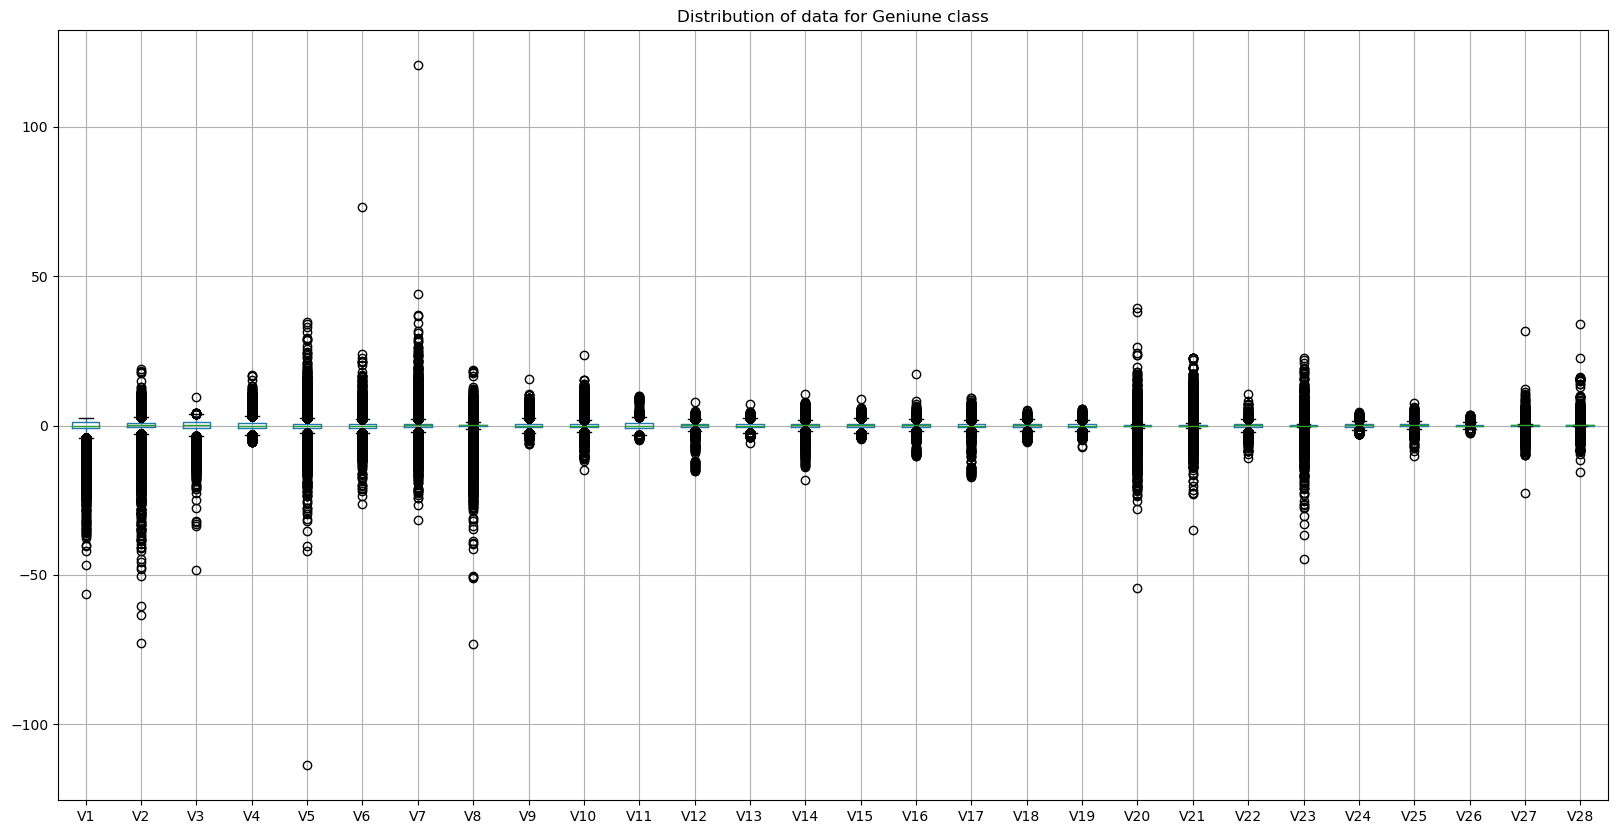

In [15]:


df[df['Class']==0].boxplot(column=list(df.columns[:-2]), figsize=(20,10)) 
plt.title('Distribution of data for Geniune class')



Text(0.5, 1.0, 'Distribution of data for Fraud class')

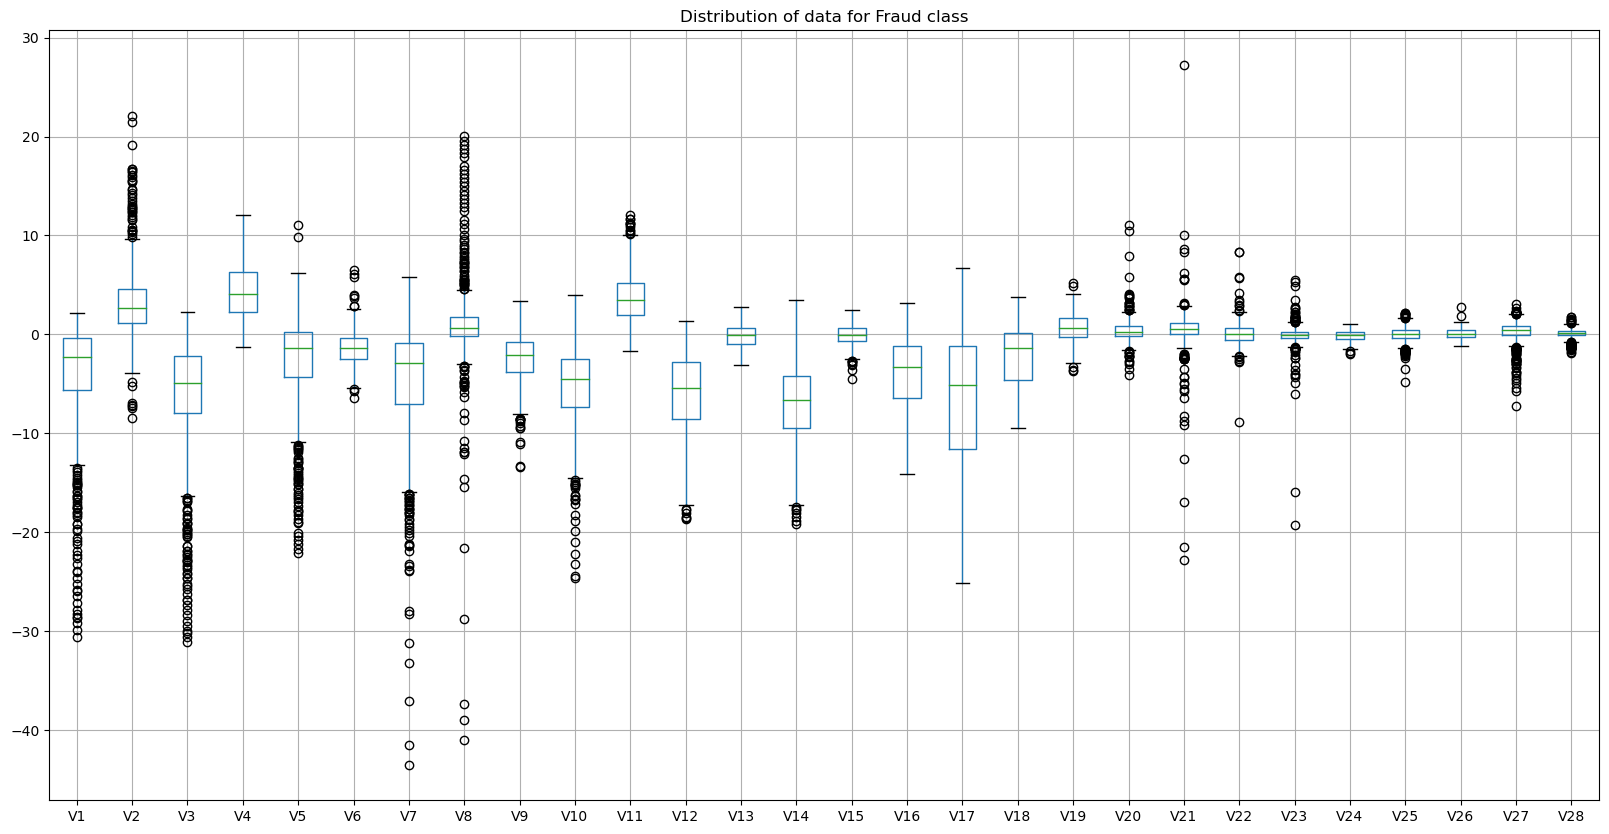

In [16]:


df[df['Class']==1].boxplot(column=list(df.columns[:-2]), figsize=(20,10)) 
plt.title('Distribution of data for Fraud class')



In [17]:
for col in df.columns[:-1]:
    df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])

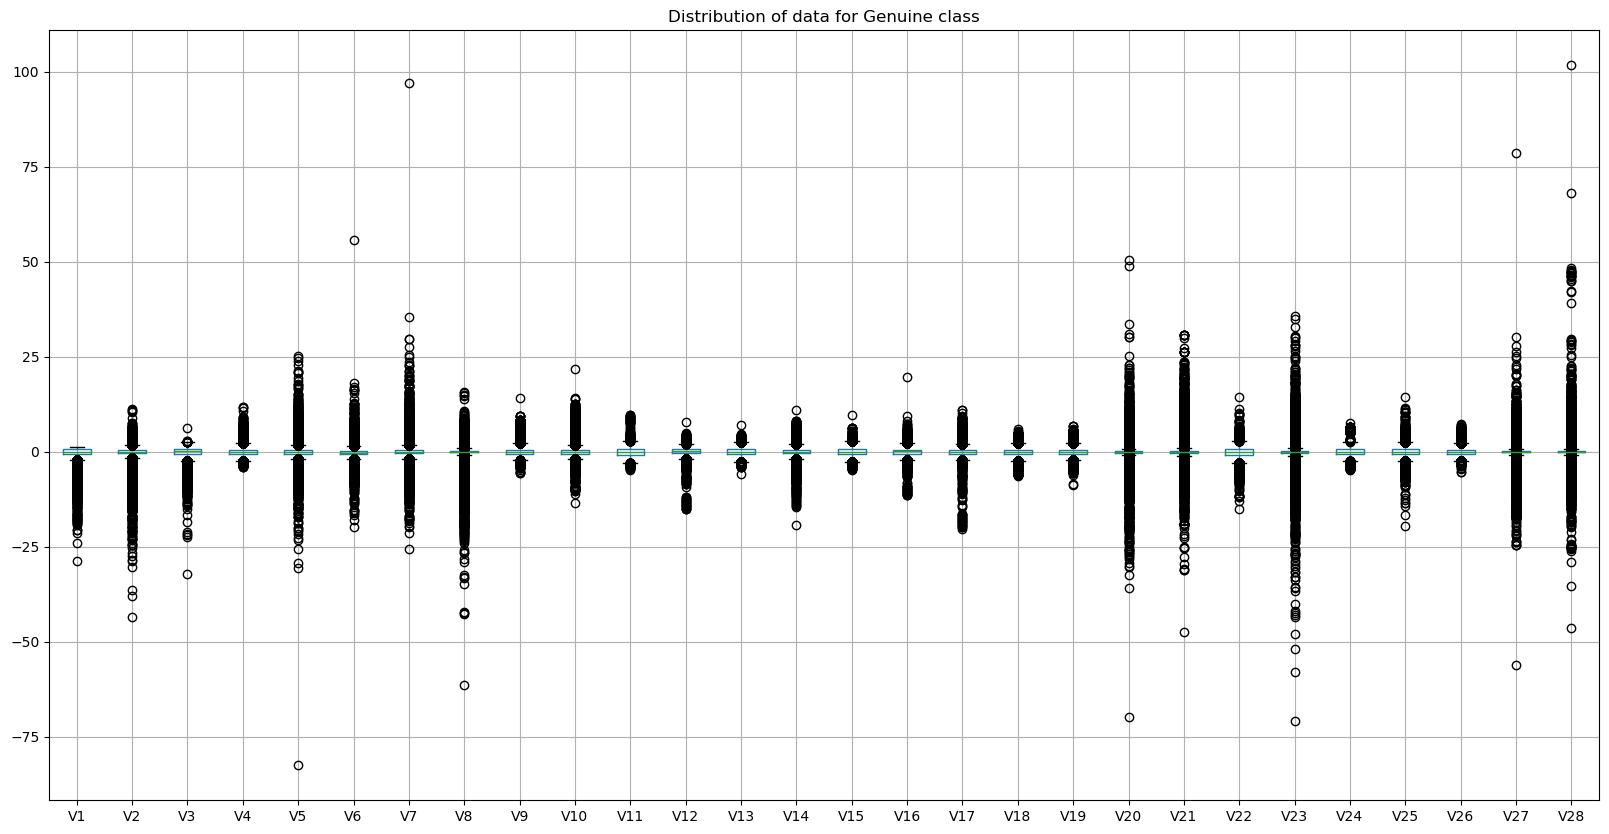

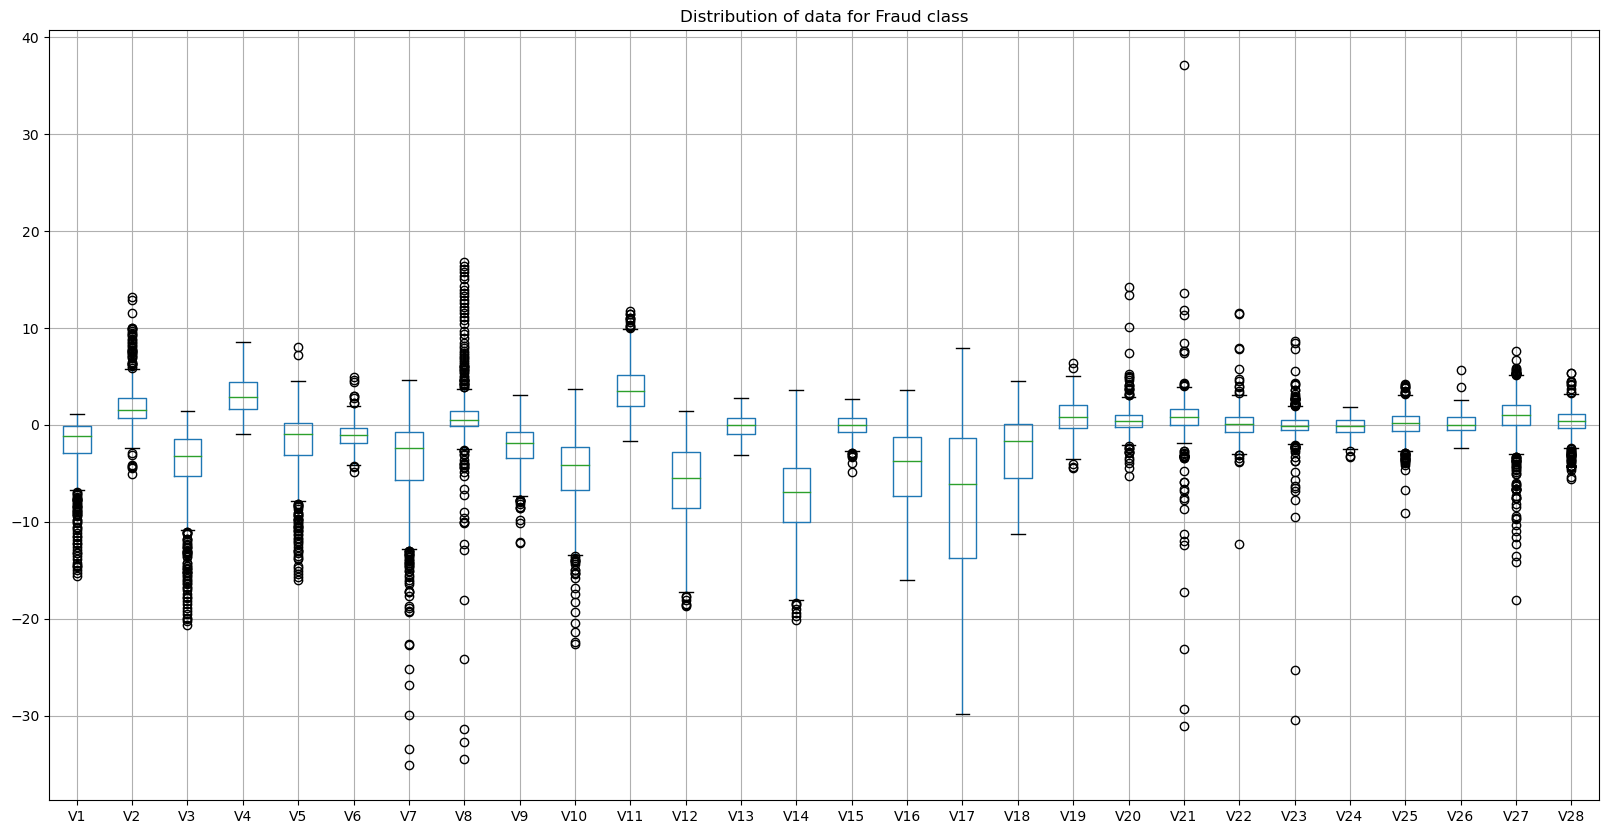

In [18]:
df[df['Class']==0].boxplot(column=list(df.columns[:-2]), figsize=(20,10)) 
plt.title('Distribution of data for Genuine class')
plt.show()

df[df['Class']==1].boxplot(column=list(df.columns[:-2]), figsize=(20,10)) 
plt.title('Distribution of data for Fraud class')
plt.show()

<AxesSubplot:>

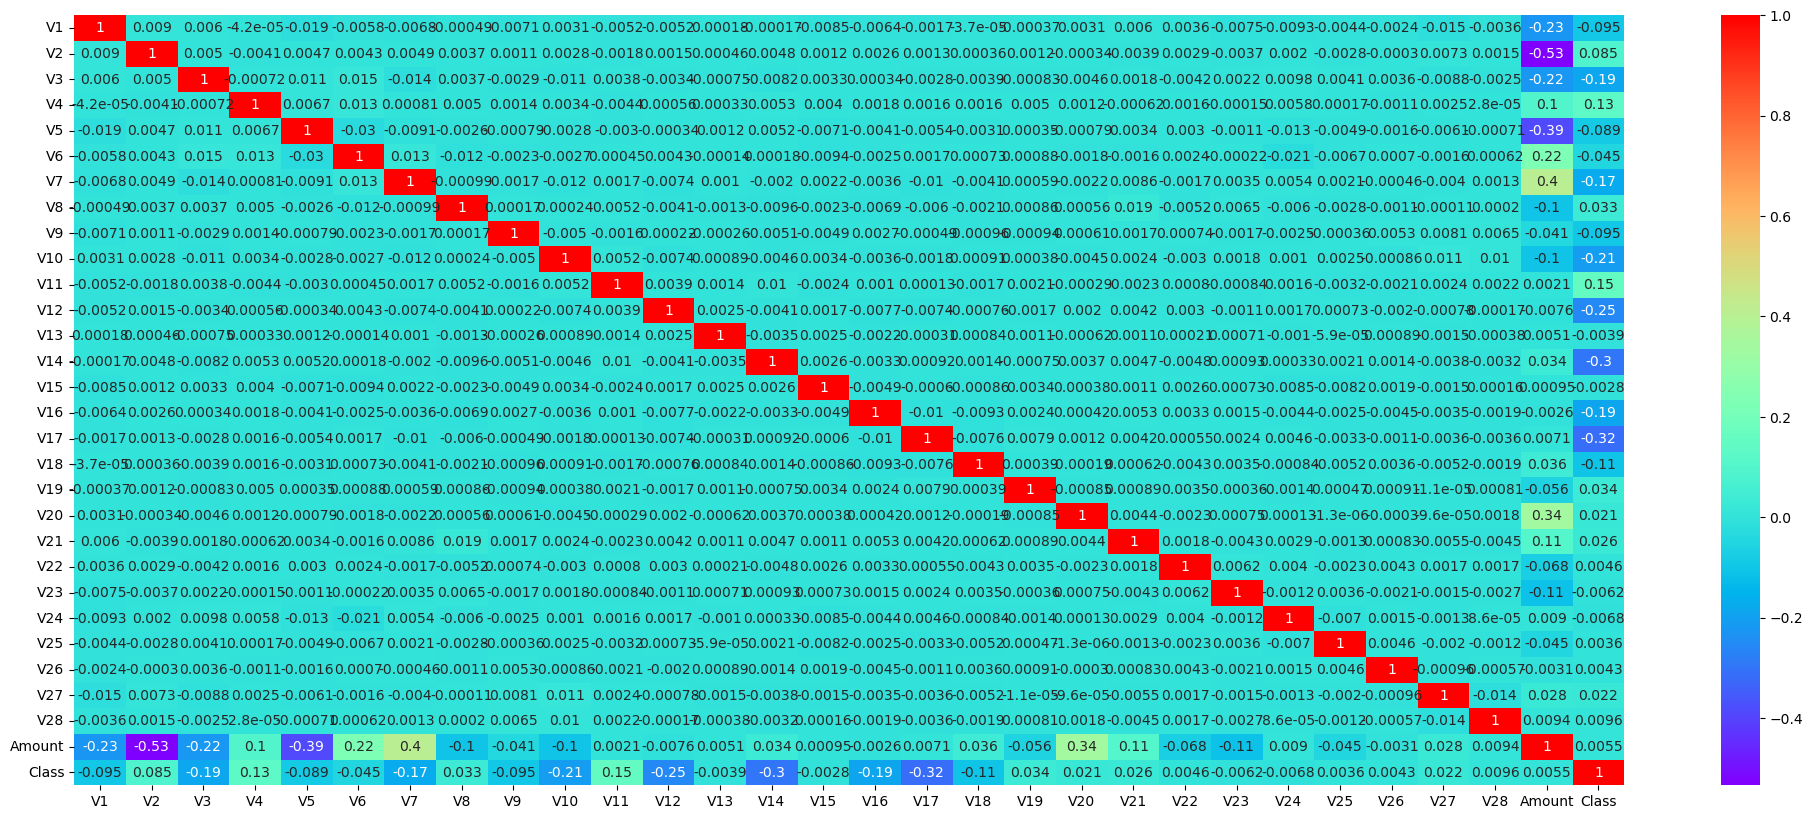

In [19]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')